In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io, util
import scipy as sp
import itertools as iter
import math
import time
from scipy import ndimage

$Q.1:\ Bilateral filter$

In [264]:
def bilat_fil(img, fil_siz, dg, h):
  img_m = np.array(io.imread(img), float)

  m,n = img_m.shape
  fs=int(fil_siz/2)
  img_m_padded = np.pad(img_m,int(fil_siz/2))
  arr = np.arange(0,int(fil_siz/2)+1)
  arr1 = np.concatenate((np.flip(arr), arr[1:]), axis=0)
  meshx, meshy = np.meshgrid(arr1, arr1.T)
  gs = (meshx**2 + meshy**2)
  gs = np.exp(-gs/(2*(dg**2)))
  # gs/=np.sum(gs)
  denoised_img = np.zeros((m,n),float)
  for i in range (m):
    for j in range (n):
      x=img_m_padded[i:i+7,j:j+7]-img_m_padded[i+3,j+3]
      H = np.exp(-x**2/(2*h))
      k = np.sum(H*gs)
      sum = np.sum(img_m_padded[i:i+7,j:j+7]*H*gs)
      denoised_img[i,j] = sum/k

  return denoised_img

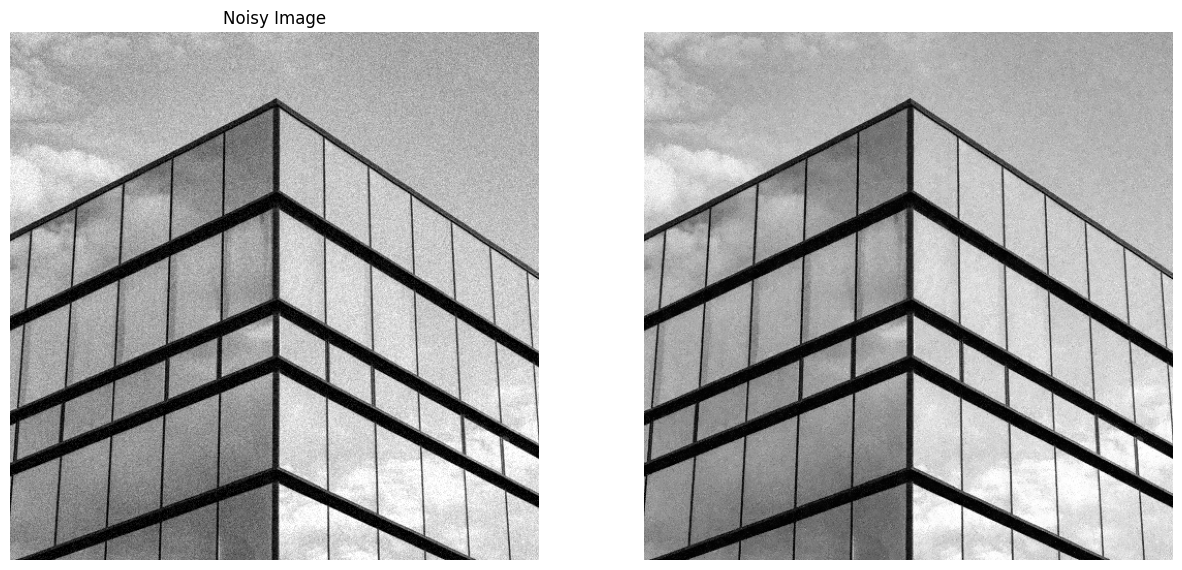

In [ ]:
bilat_img = bilat_fil("/content/building_noisy.png", 7, 150, 100)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Noisy Image")
plt.imshow(np.array(io.imread("/content/building_noisy.png"), float) , cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Denoised Image")
plt.imshow(bilat_img, cmap="gray" )

In [277]:
def gaussian_filter(img, fil_siz, dg):
  img_m = np.array(io.imread(img))

  m,n = img_m.shape
  img_m_padded = np.pad(img_m,int(fil_siz/2))
  arr = np.arange(0,int(fil_siz/2)+1)
  arr1 = np.concatenate((np.flip(arr), arr[1:]), axis=0)
  meshx, meshy = np.meshgrid(arr1, arr1.T)
  gs = (meshx**2 + meshy**2)
  gs = np.exp(-gs/(2*(dg**2)))
  gs/=(1/(2*np.pi*dg**2))
  gs/=np.sum(gs)
  gauss_img = np.zeros((m,n), float)

  for i in range (m):
    for j in range (n):
      gauss_img[i,j] = np.sum(img_m_padded[i:i+fil_siz,j:j+fil_siz]*gs)
  # plt.imshow(gauss_img, cmap="gray")
  return gauss_img

In [187]:
def laplace_filter(img_m):

  m,n = img_m.shape
  img_m_padded = np.pad(img_m,1)
  ls = np.array([[0,1,0],
                 [1,-4,1],
                 [0,1,0]])
  lap_img = np.zeros((m,n), float)

  for i in range (m):
    for j in range (n):
      lap_img[i,j] = np.sum(img_m_padded[i:i+3,j:j+3]*ls)

  return lap_img

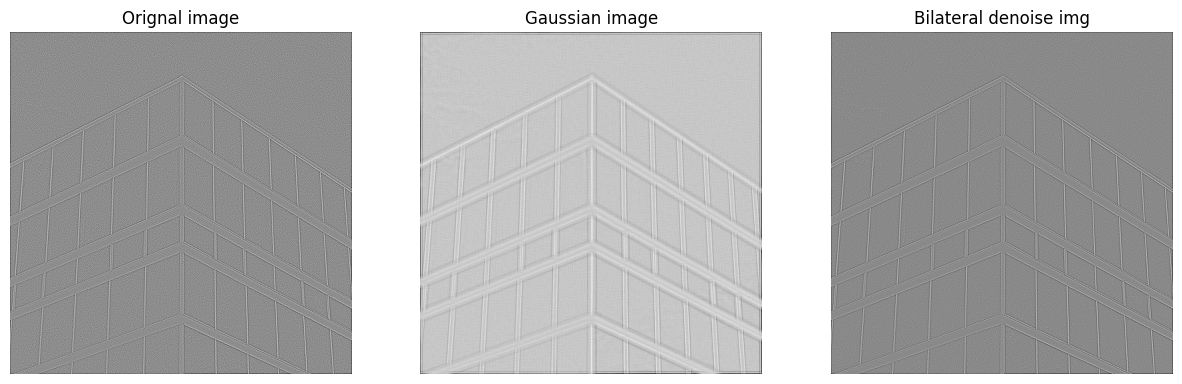

In [266]:
img_m = np.array(io.imread("/content/building_noisy.png"))
img_gauss = gaussian_filter("/content/building_noisy.png", 7, 500)
img_bilat = bilat_fil("/content/building_noisy.png", 7, 150, 100)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Orignal image")
plt.imshow(laplace_filter(img_m), cmap='gray')
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Gaussian image")
plt.imshow(laplace_filter(img_gauss), cmap="gray")
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Bilateral denoise img")
plt.imshow(laplace_filter(img_bilat), cmap="gray")


$Question\:2$

In [254]:
def edge_det(img_m, th):
  m,n = img_m.shape
  dmax = int(math.sqrt(m**2+n**2))+1000
  H = np.zeros((2*dmax, 180), int)

  ki = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])
  kj = np.array([[1,0,-1],
                [1,0,-1],
                [1,0,-1]])

  grad_i=ndimage.convolve(abs(img_m), ki, mode='constant', cval=0.0)
  grad_j=ndimage.convolve(abs(img_m), kj, mode='constant', cval=0.0)

  t=th
  grad_map = np.sqrt(grad_i**2+grad_j**2)
  edge = np.full((m,n), 255, int)
  edge[grad_map>t] = 0
  return edge

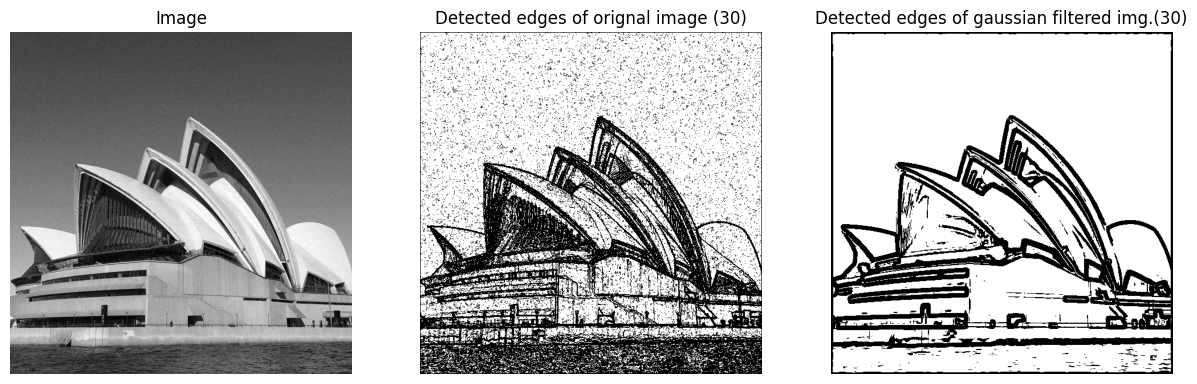

In [258]:
img_path = "/content/architecture_noisy1.png"
img_gauss = gaussian_filter(img_path, 7, 500)

og_th = 30
gauss_th = 30

edge_img = edge_det(np.array(io.imread(img_path))/255, og_th/255)
edge_gauss = edge_det(img_gauss/255, gauss_th/255)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Image")
plt.imshow(np.array(io.imread(img_path)), cmap="gray")
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Detected edges of orignal image ("+str(og_th)+")")
plt.imshow(edge_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Detected edges of gaussian filtered img.("+str(gauss_th)+")")
plt.imshow(edge_gauss, cmap="gray")


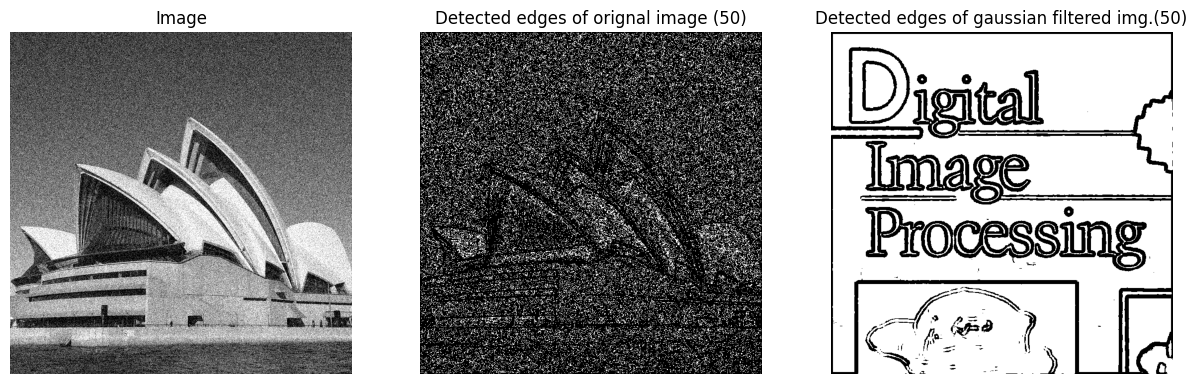

In [280]:
img_path2 = "/content/architecture_noisy2.png"
img_gauss2 = gaussian_filter(img_path, 7, 500)

og_th2 = 50
gauss_th2 = 50
edge_img2 = edge_det(np.array(io.imread(img_path2))/255, og_th2/255)
edge_gauss2 = edge_det(img_gauss2/255, gauss_th2/255)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Image")
plt.imshow(np.array(io.imread(img_path2)), cmap="gray")
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Detected edges of orignal image ("+str(og_th)+")")
plt.imshow(edge_img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Detected edges of gaussian filtered img.("+str(gauss_th)+")")
plt.imshow(edge_gauss2, cmap="gray")


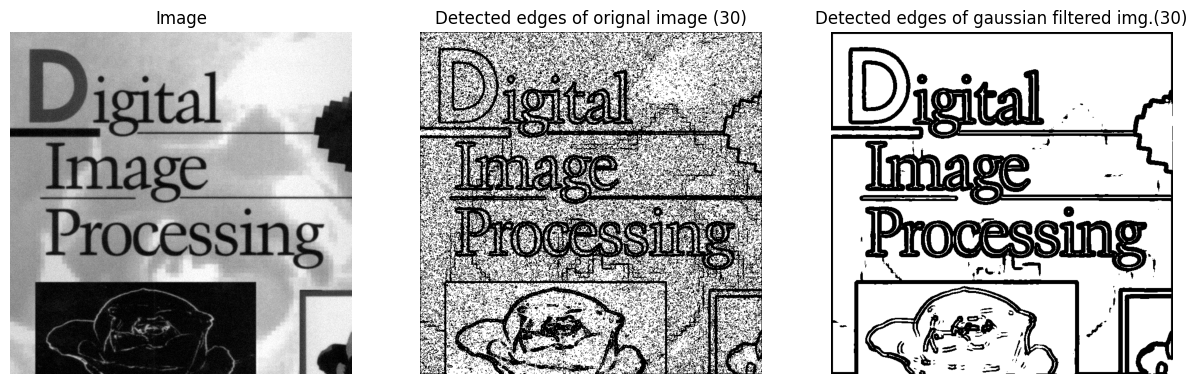

In [260]:
img_path = "/content/book_noisy1.png"
img_gauss = gaussian_filter(img_path, 7, 500)

og_th = 30
gauss_th = 30

edge_img = edge_det(np.array(io.imread(img_path))/255, og_th/255)
edge_gauss = edge_det(img_gauss/255, gauss_th/255)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Image")
plt.imshow(np.array(io.imread(img_path)), cmap="gray")
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Detected edges of orignal image ("+str(og_th)+")")
plt.imshow(edge_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Detected edges of gaussian filtered img.("+str(gauss_th)+")")
plt.imshow(edge_gauss, cmap="gray")


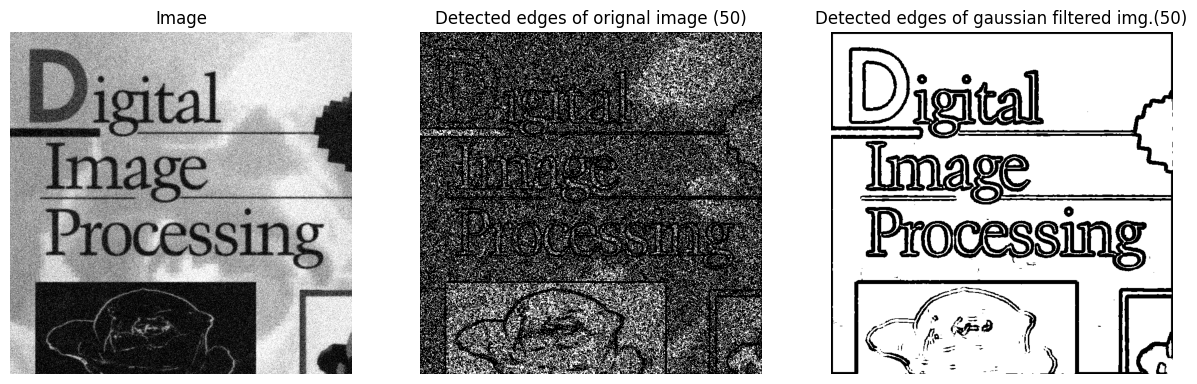

In [262]:
img_path = "/content/book_noisy2.png"
img_gauss = gaussian_filter(img_path, 7, 500)

og_th = 50
gauss_th = 50

edge_img = edge_det(np.array(io.imread(img_path))/255, og_th/255)
edge_gauss = edge_det(img_gauss/255, gauss_th/255)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Image")
plt.imshow(np.array(io.imread(img_path)), cmap="gray")
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Detected edges of orignal image ("+str(og_th)+")")
plt.imshow(edge_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Detected edges of gaussian filtered img.("+str(gauss_th)+")")
plt.imshow(edge_gauss, cmap="gray")


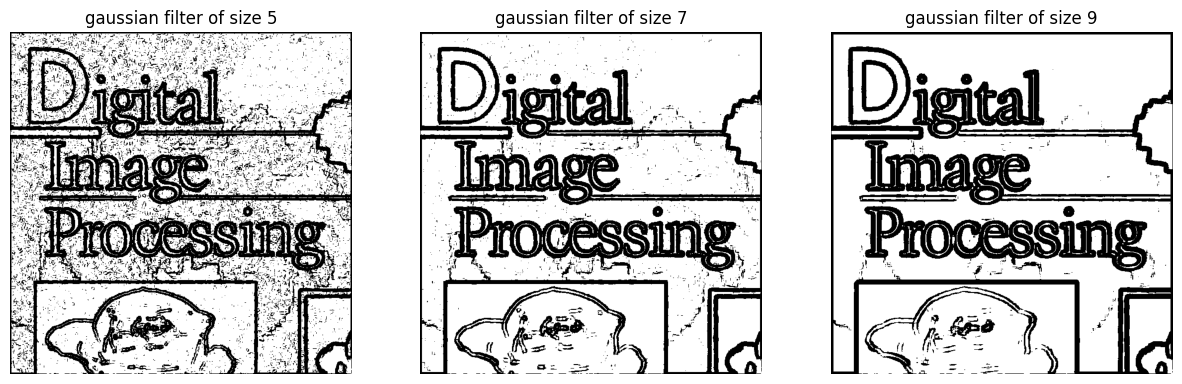

In [282]:
img_path = "/content/book_noisy2.png"
img_gauss1 = gaussian_filter(img_path, 5, 500)
img_gauss2 = gaussian_filter(img_path, 7, 500)
img_gauss3 = gaussian_filter(img_path, 9, 500)


th = 30

edge_gauss1 = edge_det(img_gauss1/255, th/255)
edge_gauss2 = edge_det(img_gauss2/255, th/255)
edge_gauss3 = edge_det(img_gauss3/255, th/255)

plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("gaussian filter of size 5")
plt.imshow(edge_gauss1, cmap="gray")
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("gaussian filter of size 7")
plt.imshow(edge_gauss2, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("gaussian filter of size 9")
plt.imshow(edge_gauss3, cmap="gray")


$question\:3$

In [315]:
def hogue(img_m, th):
  m,n = img_m.shape
  dmax = int(math.sqrt(m**2+n**2))+1000
  # out_img =
  H = np.zeros((2*dmax, 180), int)

  ki = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])
  kj = np.array([[1,0,-1],
                [1,0,-1],
                [1,0,-1]])

  grad_i=ndimage.convolve(img_m, ki, mode='constant', cval=0.0)
  grad_j=ndimage.convolve(img_m, kj, mode='constant', cval=0.0)

  t=100/255
  grad_map = np.sqrt(grad_i**2+grad_j**2)
  grad_map /= np.max(grad_map)
  grad_map[grad_map>t] = 255
  grad_map[grad_map<=t] = 0
  gy, gx = np.where(grad_map == 255)
  print(gy.shape)
  for a in range (gy.shape[0]):
    for k in range (-90,90,1):
      d= int(gx[a]*math.cos(math.pi/180*k) + gy[a]*math.sin(math.pi/180*k))
      #print(d, k)
      H[d+dmax,k+90] += 1
  max_val = np.max(H)
  print(max_val)
  threshold = th
  h_d, h_theta = np.where(H > threshold)
  dm=1000
  image = gimg_m.copy
  for a in range (h_d.shape[0]):
    c=math.cos(math.pi/180*(h_theta[a]-90))
    s=math.sin(math.pi/180*(h_theta[a]-90))
    x1= int((h_d[a]-dmax)*c-dm*s)
    y1= int((h_d[a]-dmax)*s+dm*c)
    x2= int((h_d[a]-dmax)*c+dm*s)
    y2= int((h_d[a]-dmax)*s-dm*c)
    start_point = (x1,y1)
    end_point = (x2,y2)
    color = (255,0,0)
    cv2.line(gimg_m, start_point, end_point, color, 1)

  plt.figure(figsize=(15,10))
  plt.subplot(1, 3, 1)
  plt.axis("off")
  plt.title("Image")
  plt.imshow(gimg_m)
  plt.subplot(1, 3, 2)
  plt.axis("off")
  plt.title("grad_map")
  plt.imshow(grad_map, cmap="gray")
  plt.subplot(1, 3, 3)
  plt.axis("off")
  plt.title("hogue")
  plt.imshow(np.log(1+H), cmap="gray", aspect=90/dmax)

(12854,)


902


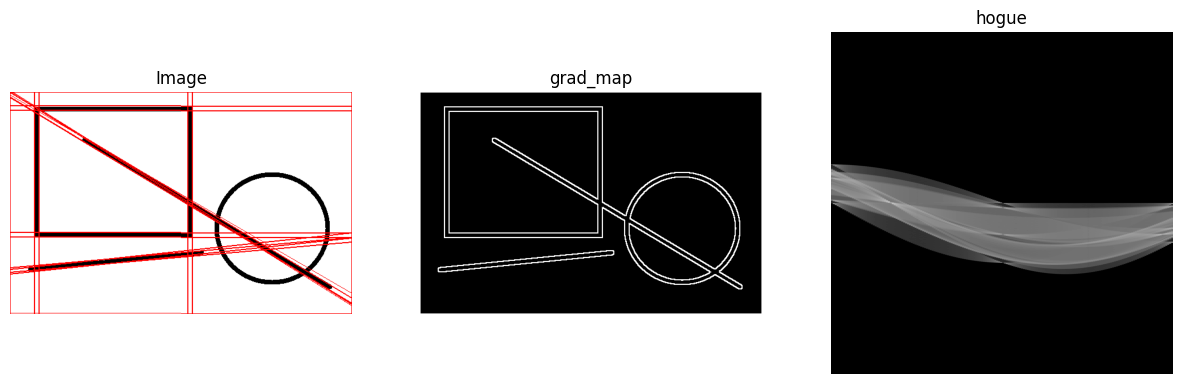

In [329]:
img = "/content/houge.png"
gimg_m = np.array(io.imread(img), float)

# Calculate grayscale values using the luminance formula (R * 0.2989 + G * 0.5870 + B * 0.1140)
img_m = np.dot(gimg_m[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
th=200
hogue(img_m, th)

(10905,)


637


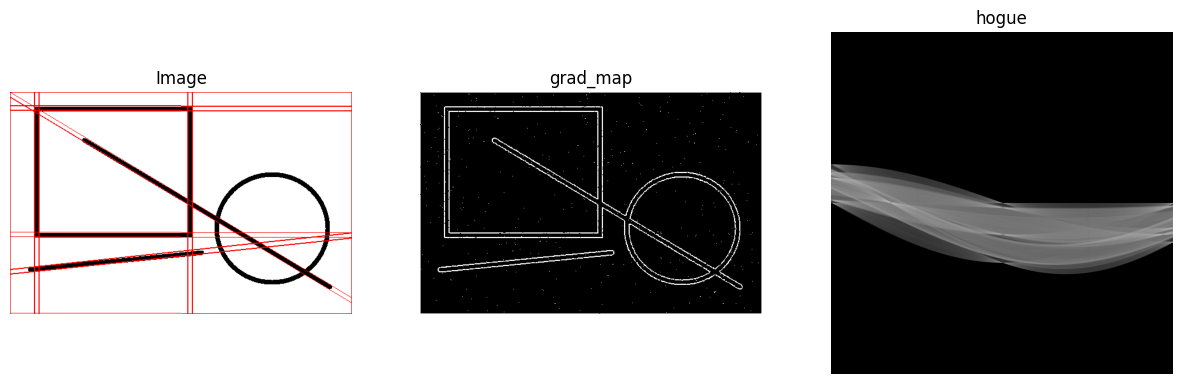

In [333]:
gimg_m = np.array(io.imread("/content/houge.png"), float)

# Calculate grayscale values using the luminance formula (R * 0.2989 + G * 0.5870 + B * 0.1140)
img_m = np.dot(gimg_m[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)


m,n = img_m.shape
noise = np.random.randn(m,n)
img_m = img_m/np.max(img_m) + noise/np.max(noise)
img_m = img_m/2*255
th=200
hogue(img_m, th)

(17238,)


513


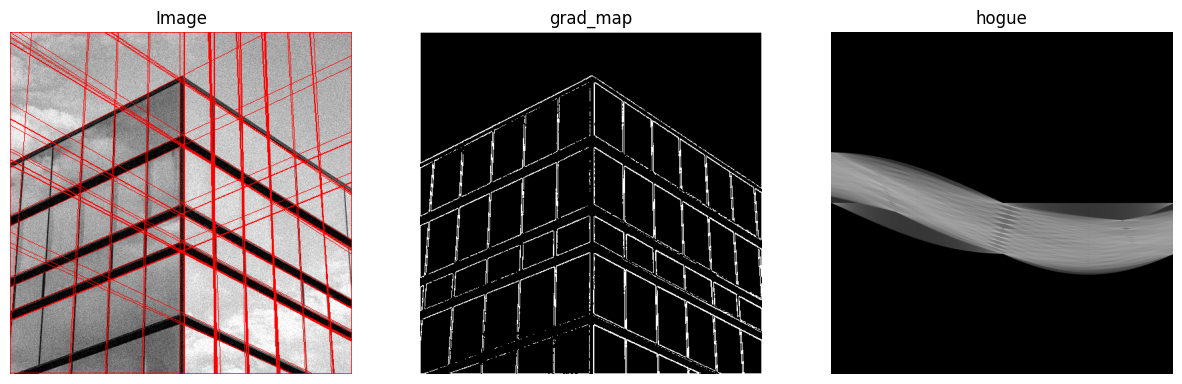

In [320]:
img_m = np.array(io.imread("/content/building_noisy.png"), float)
m,n = img_m.shape
gimg_m = np.zeros((m,n,3))

gimg_m[:,:,0] = img_m/255
gimg_m[:,:,1] = img_m/255
gimg_m[:,:,2] = img_m/255

th=155

hogue(img_m, th)

(15166,)


820


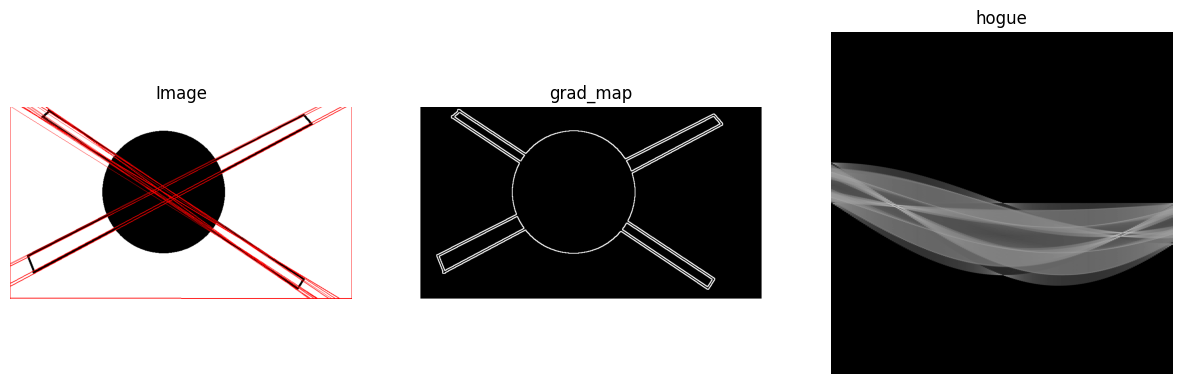

In [337]:
img = "/content/houge2.png"
gimg_m = np.array(io.imread(img), float)

# Calculate grayscale values using the luminance formula (R * 0.2989 + G * 0.5870 + B * 0.1140)
img_m = np.dot(gimg_m[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
th=240
hogue(img_m, th)